# Pengumpulan dan Pengecekan Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.datasets import make_blobs
import datetime
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from pylab import rcParams
%matplotlib inline

In [2]:
df = pd.read_csv('city_temperature.csv')

C:\Users\A C E R\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [5]:
df.isnull().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

# Prepocessing Data

In [6]:
#Menghapus kolom State dikarenakan nullnya mencapai 50% dan tipe data dari kolom State bukan numeric sehingga tidak bisa dilakukan pengisian data dikolom State
df.drop('State',axis=1,inplace=True)

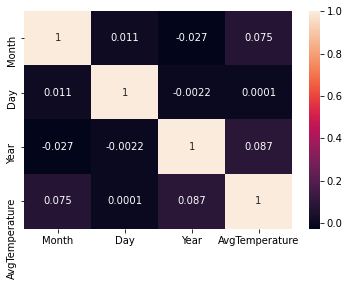

In [7]:
df_small = df.iloc[:,:21]
correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [8]:
df.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


In [9]:
len(df)

2906327

In [10]:
df2 = df[df['Year'] == 2020]

In [11]:
len(df),len(df2)

(2906327, 38810)

In [12]:
df2.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
9132,Africa,Algeria,Algiers,1,1,2020,46.3
9133,Africa,Algeria,Algiers,1,2,2020,45.4
9134,Africa,Algeria,Algiers,1,3,2020,48.0
9135,Africa,Algeria,Algiers,1,4,2020,53.4
9136,Africa,Algeria,Algiers,1,5,2020,47.3


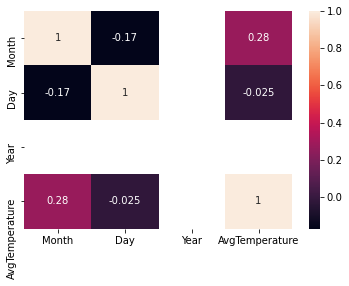

In [13]:
df2_small = df2.iloc[:,:21]
correlation_mat = df2_small.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [14]:
month = df2['Month']
day = df2['Day']
year = df2['Year']
avgt = df2['AvgTemperature']
df2.drop(['Month','Day','Year','AvgTemperature'], axis=1, inplace=True)

C:\Users\A C E R\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
df2.insert(0, 'AvgTemperature', avgt)
df2.insert(1, 'Month', month)
df2.insert(2, 'Day', day)
df2.insert(3, 'Year', year)
df2

,AvgTemperature,Month,Day,Year,Region,Country,City
9132,46.3,1,1,2020,Africa,Algeria,Algiers
9133,45.4,1,2,2020,Africa,Algeria,Algiers
9134,48.0,1,3,2020,Africa,Algeria,Algiers
9135,53.4,1,4,2020,Africa,Algeria,Algiers
9136,47.3,1,5,2020,Africa,Algeria,Algiers
...,...,...,...,...,...,...,...
2899535,42.3,5,9,2020,North America,US,Cheyenne
2899536,43.1,5,10,2020,North America,US,Cheyenne
2899537,37.8,5,11,2020,North America,US,Cheyenne
2899538,41.9,5,12,2020,North America,US,Cheyenne


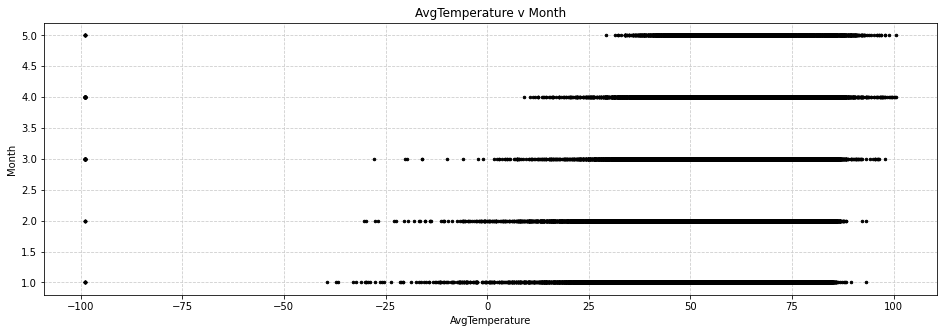

In [16]:
rcParams['figure.figsize'] = 16, 5

_ = plt.plot(df2['AvgTemperature'], df2['Month'],
            linestyle=None, linewidth=0, marker='.', markersize=5, color='black')
_ = plt.title('AvgTemperature v Month')
_ = plt.grid(which='major', color='#cccccc', linestyle='--')
_ = plt.xlabel('AvgTemperature')
_ = plt.ylabel('Month')
_ = plt.show()

In [17]:
df_c = df2[['AvgTemperature', 'Month']]
df_c.head()

,AvgTemperature,Month
9132,46.3,1
9133,45.4,1
9134,48.0,1
9135,53.4,1
9136,47.3,1


In [18]:
X = df_c.iloc[:, :].values
X

array([[46.3,  1. ],
       [45.4,  1. ],
       [48. ,  1. ],
       ...,
       [37.8,  5. ],
       [41.9,  5. ],
       [48.5,  5. ]])

In [19]:
wscc = []

for i in range(1,12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                   n_init = 10, random_state = 42)
    kmeans.fit(X)
    wscc.append(kmeans.inertia_)

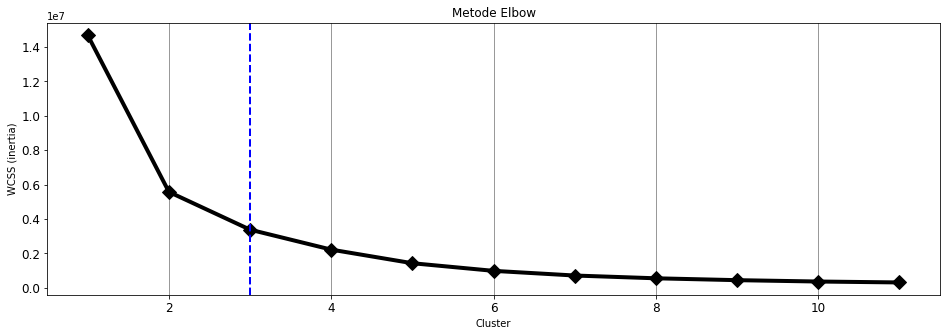

In [20]:
_ = plt.plot(range(1, 12), wscc, linewidth = 4, color = 'black',
            marker = 'D', markersize = 10)
_ = plt.title('Metode Elbow')
_ = plt.xlabel('Cluster')
_ = plt.ylabel('WCSS (inertia)')
_ = plt.xticks(fontsize = 12, color = 'black')
_ = plt.yticks(fontsize = 12, color = 'black')
_ = plt.grid(which = 'both', color = 'black', axis = 'x', alpha = 0.5)

jml_cluster = 3
_ = plt.axvline(x = jml_cluster, linewidth = 2, color = 'blue', linestyle = '--')
_ = plt.show()

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
silhouette_score(X, kmeans.labels_)

0.45856223778412475

In [23]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1,10)]
silhouette_score = [silhouette_score(X, model.labels_)
                   for model in kmeans_per_k[1:]]
silhouette_score

[0.5728820276968339,
 0.5314002249216383,
 0.5379098469829926,
 0.5171747539126167,
 0.5132270972721705,
 0.5032865794337157,
 0.49127102885702467,
 0.4823592496162879]

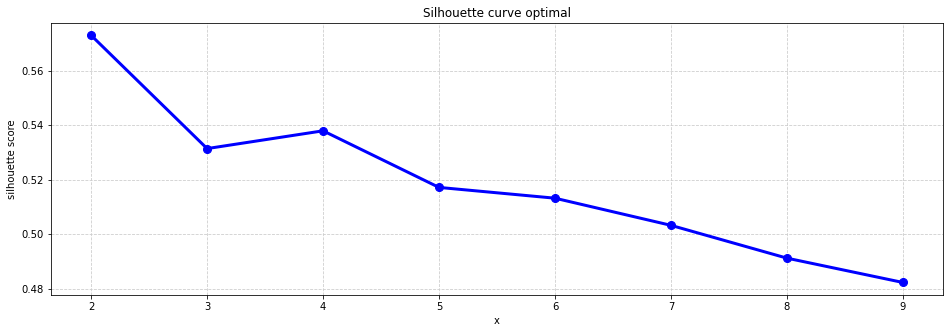

In [32]:
rcParams['figure.figsize'] = 16,5
_ = plt.plot(range(2, 10), silhouette_score, "bo-", color='blue',
            linewidth=3, markersize=8, label='Silhouette curve')
_ = plt.xlabel('x')
_ = plt.ylabel('silhouette score')
_ = plt.title('Silhouette curve optimal')
_ = plt.grid(which='major', color='#cccccc', linestyle='--')


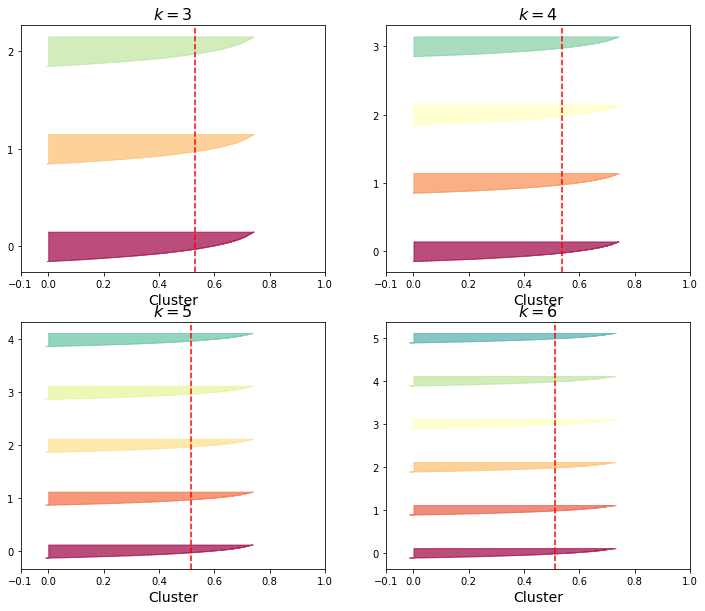

In [25]:
plt.figure(figsize=(12, 10))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    
    padding = len(X)
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == 1]
        coeffs.sort()
        
        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 4, 5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel('Cluster', fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
        
    plt.axvline(x=silhouette_score[k -2], color='red', linestyle='--')
    plt.title('$k={}$'.format(k), fontsize=16)
    
plt.show()

In [26]:
kmeans = KMeans(n_clusters=3 ,init="k-means++")
kmeans = kmeans.fit(df2[['AvgTemperature','Month']])

In [27]:
df2['Clusters'] = kmeans.labels_

<ipython-input-27-80bf2d2ea23f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Clusters'] = kmeans.labels_


<AxesSubplot:xlabel='AvgTemperature', ylabel='Month'>

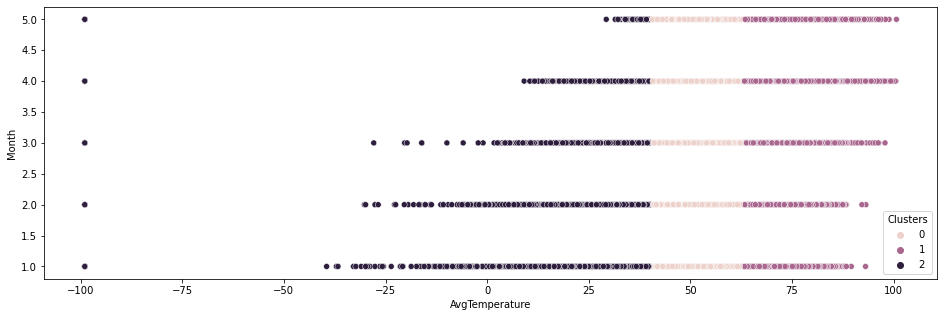

In [28]:
sns.scatterplot(x="AvgTemperature", y="Month",hue = 'Clusters',  data=df2)

(array([16880.,     0.,     0.,     0.,     0., 12478.,     0.,     0.,
            0.,  9452.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

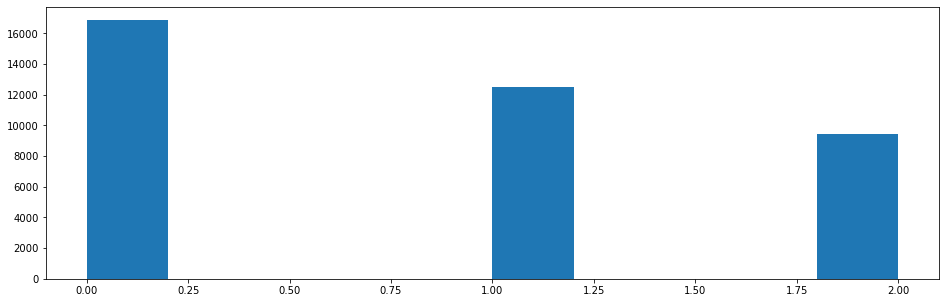

In [29]:
plt.hist(df2['Clusters'])

C:\Users\A C E R\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\A C E R\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\A C E R\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


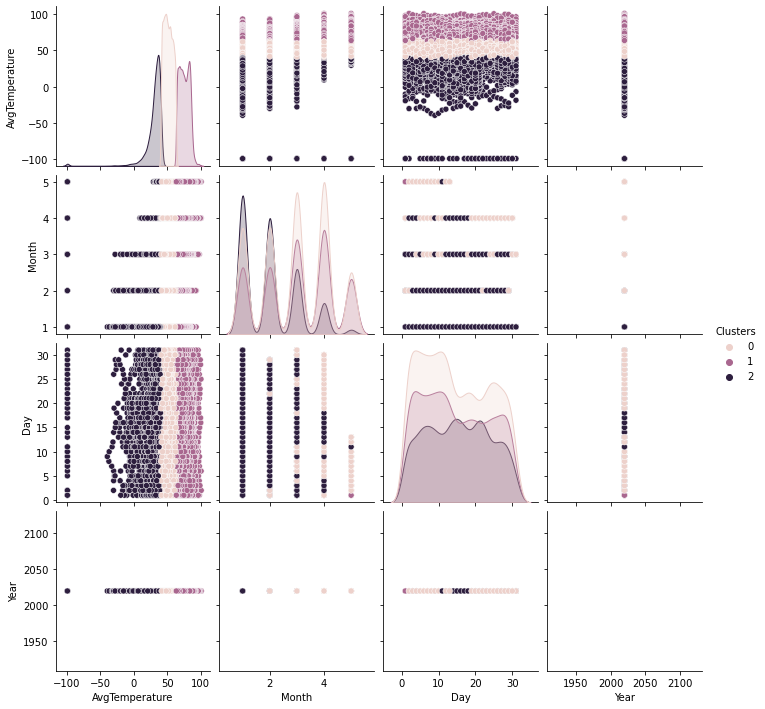

In [33]:
sns.pairplot(df2,hue='Clusters')

In [37]:
df2.head()

,AvgTemperature,Month,Day,Year,Region,Country,City,Clusters
9132,46.3,1,1,2020,Africa,Algeria,Algiers,0
9133,45.4,1,2,2020,Africa,Algeria,Algiers,0
9134,48.0,1,3,2020,Africa,Algeria,Algiers,0
9135,53.4,1,4,2020,Africa,Algeria,Algiers,0
9136,47.3,1,5,2020,Africa,Algeria,Algiers,0
